**Pre-processing, Training and Modelling -- Capstone 2 -- Predicting house prices**

In [168]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
# pd.set_option('max_columns', 100)

In [169]:
df = pd.read_csv(r"D:\Data_Science\SecondCapstoneProjectDS\New folder\EDA_data.csv")

In [170]:
df.head()

,Unnamed: 0,Price (in rupees),location,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car_Parking,Ownership,Amount_in_Crore,BHK,Carpet_Area_sqft,Super Area (sqft)
0,0,9646.0,kolkata,Ready to Move,2 out of 4,New Property,Unfurnished,Unknown,Main Road,One Rajarhat,2.0,2.0,1 Covered,Freehold,0.012,2.0,740.0,1314.654894
1,1,4062.0,bangalore,Ready to Move,4 out of 4,Resale,Semi-Furnished,East,Unknown,Unknown,2.0,2.0,Not Specified,Unknown,0.650,2.0,1050.0,1314.654894
2,3,2700.0,raipur,Ready to Move,1 out of 8,New Property,Unfurnished,East,Main Road,Dolphin Jewel O,3.0,2.0,1 Covered,Co-operative Society,0.444,3.0,1300.0,1314.654894
3,4,7666.0,kolkata,Ready to Move,12 out of 20,Resale,Semi-Furnished,East,Main Road,Diamond City South,2.0,2.0,1 Open,Freehold,0.011,3.0,0.0,1435.000000
4,5,2341.0,bhiwadi,Ready to Move,10 out of 13,Resale,Unfurnished,North - East,Garden/Park,Krish Aura,2.0,4.0,1 Covered,Freehold,0.240,2.0,0.0,1025.000000


In [171]:
# Create dummy or indicator features for categorical variables
# Standardize the magnitude of numeric features using a scaler
# Split your data into testing and training datasets
# Making a Scaler object
# scaler = preprocessing.StandardScaler()
# # Fitting data to the scaler object
# scaled_df = scaler.fit_transform(df)
# scaled_df = pd.DataFrame(scaled_df, columns=names)

In [172]:
# dummies = pd.get_dummies(df.Ownership)
# dummies

In [173]:
# using get_dummies function to create dummy feature of the following columns
col_dummies=['Status', 'Transaction', 'Furnishing', 'facing', 'overlooking', 'Ownership']
df_encoded = pd.get_dummies(df, columns=col_dummies, drop_first=True)
df_encoded.head()

,Unnamed: 0,Price (in rupees),location,Floor,Society,Bathroom,Balcony,Car_Parking,Amount_in_Crore,BHK,...,overlooking_Pool,"overlooking_Pool, Garden/Park","overlooking_Pool, Garden/Park, Main Road","overlooking_Pool, Main Road","overlooking_Pool, Main Road, Garden/Park",overlooking_Unknown,Ownership_Freehold,Ownership_Leasehold,Ownership_Power Of Attorney,Ownership_Unknown
0,0,9646.0,kolkata,2 out of 4,One Rajarhat,2.0,2.0,1 Covered,0.012,2.0,...,False,False,False,False,False,False,True,False,False,False
1,1,4062.0,bangalore,4 out of 4,Unknown,2.0,2.0,Not Specified,0.650,2.0,...,False,False,False,False,False,True,False,False,False,True
2,3,2700.0,raipur,1 out of 8,Dolphin Jewel O,3.0,2.0,1 Covered,0.444,3.0,...,False,False,False,False,False,False,False,False,False,False
3,4,7666.0,kolkata,12 out of 20,Diamond City South,2.0,2.0,1 Open,0.011,3.0,...,False,False,False,False,False,False,True,False,False,False
4,5,2341.0,bhiwadi,10 out of 13,Krish Aura,2.0,4.0,1 Covered,0.240,2.0,...,False,False,False,False,False,False,True,False,False,False


In [174]:
dummy_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[dummy_cols]=df_encoded[dummy_cols].astype(int)

In [175]:
# from sklearn.preprocessing import LabelEncoder
# # Function to perform Label Encoding for multiple columns
# def label_encode_multiple(df_encoded, columns):
#     le = LabelEncoder()
#     for column in columns:
#         df_encoded[column] = le.fit_transform(df_encoded[column])
#     return df_encoded

# label_encode_columns = ['Society', 'location']
# df = label_encode_multiple(df_encoded, label_encode_columns)

In [176]:
mean_price = df_encoded.groupby('location')['Price (in rupees)'].mean()
df_encoded['location_target'] = df_encoded['location'].map(mean_price)
df_encoded.head()

,Unnamed: 0,Price (in rupees),location,Floor,Society,Bathroom,Balcony,Car_Parking,Amount_in_Crore,BHK,...,"overlooking_Pool, Garden/Park","overlooking_Pool, Garden/Park, Main Road","overlooking_Pool, Main Road","overlooking_Pool, Main Road, Garden/Park",overlooking_Unknown,Ownership_Freehold,Ownership_Leasehold,Ownership_Power Of Attorney,Ownership_Unknown,location_target
0,0,9646.0,kolkata,2 out of 4,One Rajarhat,2.0,2.0,1 Covered,0.012,2.0,...,0,0,0,0,0,1,0,0,0,5880.054983
1,1,4062.0,bangalore,4 out of 4,Unknown,2.0,2.0,Not Specified,0.650,2.0,...,0,0,0,0,1,0,0,0,1,7459.166667
2,3,2700.0,raipur,1 out of 8,Dolphin Jewel O,3.0,2.0,1 Covered,0.444,3.0,...,0,0,0,0,0,0,0,0,0,3230.425532
3,4,7666.0,kolkata,12 out of 20,Diamond City South,2.0,2.0,1 Open,0.011,3.0,...,0,0,0,0,0,1,0,0,0,5880.054983
4,5,2341.0,bhiwadi,10 out of 13,Krish Aura,2.0,4.0,1 Covered,0.240,2.0,...,0,0,0,0,0,1,0,0,0,2842.704301


In [177]:
mean_price = df_encoded.groupby('Society')['Price (in rupees)'].mean()
df_encoded['Society_target'] = df_encoded['Society'].map(mean_price)
df_encoded.head()

,Unnamed: 0,Price (in rupees),location,Floor,Society,Bathroom,Balcony,Car_Parking,Amount_in_Crore,BHK,...,"overlooking_Pool, Garden/Park, Main Road","overlooking_Pool, Main Road","overlooking_Pool, Main Road, Garden/Park",overlooking_Unknown,Ownership_Freehold,Ownership_Leasehold,Ownership_Power Of Attorney,Ownership_Unknown,location_target,Society_target
0,0,9646.0,kolkata,2 out of 4,One Rajarhat,2.0,2.0,1 Covered,0.012,2.0,...,0,0,0,0,1,0,0,0,5880.054983,9646.000000
1,1,4062.0,bangalore,4 out of 4,Unknown,2.0,2.0,Not Specified,0.650,2.0,...,0,0,0,1,0,0,0,1,7459.166667,5997.880255
2,3,2700.0,raipur,1 out of 8,Dolphin Jewel O,3.0,2.0,1 Covered,0.444,3.0,...,0,0,0,0,0,0,0,0,3230.425532,2730.000000
3,4,7666.0,kolkata,12 out of 20,Diamond City South,2.0,2.0,1 Open,0.011,3.0,...,0,0,0,0,1,0,0,0,5880.054983,7150.333333
4,5,2341.0,bhiwadi,10 out of 13,Krish Aura,2.0,4.0,1 Covered,0.240,2.0,...,0,0,0,0,1,0,0,0,2842.704301,2553.777778


In [178]:
from sklearn.preprocessing import LabelEncoder

In [179]:
# df_encoded['Floor'].unique()

In [180]:
def extract_floor(x):
    x = str(x)
    if 'Ground' in x:
        return 0
    elif 'Upper Basement' in x:
        return 1
    elif 'Lower Basement' in x:
        return -1
    else:
        return int(x.split(' out of ')[0])

df_encoded['Floor_No'] = df_encoded['Floor'].apply(extract_floor)

In [181]:
def extract_total_floors(x):
    x = str(x)
    if 'out of' in x:
        return int(x.split(' out of ')[-1])
    elif 'Ground' in x:
        return 1  # usually 1 floor
    elif 'Upper Basement' in x:
        return 1  # assuming 1 floor below
    elif 'Lower Basement' in x:
        return 1
    else:
        return np.nan  # if totally missing or unknown

df_encoded['Total_floors'] = df_encoded['Floor'].apply(extract_total_floors)

In [182]:
df_encoded['Total_floors'].unique()

array([ 4.,  8., 20., 13.,  6.,  1., 15., 11.,  5., 14.,  3.,  2.,  9.,
       10., 30., 18.,  7., 16., 32., 51., 19., 21., 17., 35., 28., 12.,
       24., 26., 23., 22., 29., 25., 34., 27., 31., 40., 36., 33., 43.,
       42., 45., 38., 41., 44., 60., 37., 55., 61., nan, 39., 50., 48.,
       52.])

In [183]:
df_encoded['Car_Parking'].unique()

array(['1 Covered', 'Not Specified', '1 Open', '1 Covered,', '2 Covered',
       '2 Covered,', '2 Open', '10 Open', '34 Covered', '3 Covered',
       '23 Open', '303 Open', '90 Covered,', '234 Covered', '211 Covered',
       '300 Open', '601 Covered', '402 Covered', '45 Open', '5 Covered',
       '3 Covered,', '12 Covered', '100 Open', '4 Open', '8 Covered',
       '509 Covered,', '20 Covered,', '6 Covered', '50 Open',
       '100 Covered', '111 Covered', '653 Open', '16 Covered',
       '4 Covered', '8 Open', '500 Open', '180 Covered', '5 Open',
       '4 Covered,', '301 Covered', '5 Covered,', '10 Covered', '3 Open',
       '123 Covered', '103 Open', '112 Covered', '202 Covered',
       '101 Covered', '14 Open', '502 Covered', '25 Covered', '7 Covered',
       '203 Covered', '7 Covered,', '108 Covered', '45 Covered',
       '323 Covered', '103 Covered', '9 Covered', '151 Open',
       '204 Covered', '413 Covered', '129 Open', '233 Open',
       '505 Covered', '306 Covered', '80 Cover

In [184]:
# # Create one LabelEncoder instance
# le = LabelEncoder()

# # Apply Label Encoding to the selected columns
# for column in ['Car_Parking']:
#     df_encoded[column] = le.fit_transform(df_encoded[column])


le=LabelEncoder()
df_encoded['Car_Parking']=le.fit_transform(df_encoded['Car_Parking'])

In [185]:
df_final = df_encoded.drop(['location', 'Society', 'Floor'], axis=1)

In [186]:
df_final.columns

Index(['Unnamed: 0', 'Price (in rupees)', 'Bathroom', 'Balcony', 'Car_Parking',
       'Amount_in_Crore', 'BHK', 'Carpet_Area_sqft', 'Super Area (sqft)',
       'Transaction_Other', 'Transaction_Rent/Lease', 'Transaction_Resale',
       'Furnishing_Semi-Furnished', 'Furnishing_Unfurnished', 'facing_North',
       'facing_North - East', 'facing_North - West', 'facing_South',
       'facing_South - East', 'facing_South -West', 'facing_Unknown',
       'facing_West', 'overlooking_Garden/Park, Main Road',
       'overlooking_Garden/Park, Main Road, Pool',
       'overlooking_Garden/Park, Pool',
       'overlooking_Garden/Park, Pool, Main Road', 'overlooking_Main Road',
       'overlooking_Main Road, Garden/Park',
       'overlooking_Main Road, Garden/Park, Pool',
       'overlooking_Main Road, Pool',
       'overlooking_Main Road, Pool, Garden/Park', 'overlooking_Pool',
       'overlooking_Pool, Garden/Park',
       'overlooking_Pool, Garden/Park, Main Road',
       'overlooking_Pool, Main

In [187]:
df_final.head()

,Unnamed: 0,Price (in rupees),Bathroom,Balcony,Car_Parking,Amount_in_Crore,BHK,Carpet_Area_sqft,Super Area (sqft),Transaction_Other,...,"overlooking_Pool, Main Road, Garden/Park",overlooking_Unknown,Ownership_Freehold,Ownership_Leasehold,Ownership_Power Of Attorney,Ownership_Unknown,location_target,Society_target,Floor_No,Total_floors
0,0,9646.0,2.0,2.0,0,0.012,2.0,740.0,1314.654894,0,...,0,0,1,0,0,0,5880.054983,9646.000000,2,4.0
1,1,4062.0,2.0,2.0,83,0.650,2.0,1050.0,1314.654894,0,...,0,1,0,0,0,1,7459.166667,5997.880255,4,4.0
2,3,2700.0,3.0,2.0,0,0.444,3.0,1300.0,1314.654894,0,...,0,0,0,0,0,0,3230.425532,2730.000000,1,8.0
3,4,7666.0,2.0,2.0,2,0.011,3.0,0.0,1435.000000,0,...,0,0,1,0,0,0,5880.054983,7150.333333,12,20.0
4,5,2341.0,2.0,4.0,0,0.240,2.0,0.0,1025.000000,0,...,0,0,1,0,0,0,2842.704301,2553.777778,10,13.0


In [188]:
df_eng=df_final.copy()

In [189]:
#feature engineering 
df_eng['Carpet_to_Super_Ratio'] = df_eng['Carpet_Area_sqft'] / df_eng['Super Area (sqft)']
df_eng['Rooms_per_Bathroom'] = df_eng['BHK'] / (df_eng['Bathroom'] + 1e-6)
df_eng['Balcony_per_BHK'] = df_eng['Balcony'] / (df_eng['BHK'] + 1e-6)
df_eng['Has_Parking'] = (df_eng['Car_Parking'] > 0).astype(int)
df_eng['Floor_Position'] = df_eng['Floor_No'] / (df_eng['Total_floors'] + 1e-6)
df_eng['Is_Penthouse'] = (df_eng['Floor_No'] == df_eng['Total_floors']).astype(int)
df_eng['Is_GroundFloor'] = (df_eng['Floor_No'] == 1).astype(int)
df_eng.columns

Index(['Unnamed: 0', 'Price (in rupees)', 'Bathroom', 'Balcony', 'Car_Parking',
       'Amount_in_Crore', 'BHK', 'Carpet_Area_sqft', 'Super Area (sqft)',
       'Transaction_Other', 'Transaction_Rent/Lease', 'Transaction_Resale',
       'Furnishing_Semi-Furnished', 'Furnishing_Unfurnished', 'facing_North',
       'facing_North - East', 'facing_North - West', 'facing_South',
       'facing_South - East', 'facing_South -West', 'facing_Unknown',
       'facing_West', 'overlooking_Garden/Park, Main Road',
       'overlooking_Garden/Park, Main Road, Pool',
       'overlooking_Garden/Park, Pool',
       'overlooking_Garden/Park, Pool, Main Road', 'overlooking_Main Road',
       'overlooking_Main Road, Garden/Park',
       'overlooking_Main Road, Garden/Park, Pool',
       'overlooking_Main Road, Pool',
       'overlooking_Main Road, Pool, Garden/Park', 'overlooking_Pool',
       'overlooking_Pool, Garden/Park',
       'overlooking_Pool, Garden/Park, Main Road',
       'overlooking_Pool, Main

In [190]:
df_eng=df_eng.drop(['Unnamed: 0'], axis=1, errors='ignore')

In [191]:
#checking missing values
df_eng=df_eng.dropna(subset=['Total_floors'])
df_eng.isna().sum()

Price (in rupees)                           0
Bathroom                                    0
Balcony                                     0
Car_Parking                                 0
Amount_in_Crore                             0
BHK                                         0
Carpet_Area_sqft                            0
Super Area (sqft)                           0
Transaction_Other                           0
Transaction_Rent/Lease                      0
Transaction_Resale                          0
Furnishing_Semi-Furnished                   0
Furnishing_Unfurnished                      0
facing_North                                0
facing_North - East                         0
facing_North - West                         0
facing_South                                0
facing_South - East                         0
facing_South -West                          0
facing_Unknown                              0
facing_West                                 0
overlooking_Garden/Park, Main Road

In [192]:
#train test split

from sklearn.model_selection import train_test_split

X=df_eng.drop(['Price (in rupees)', 'Amount_in_Crore'], axis=1)
y=df_eng[['Price (in rupees)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [193]:
#scale data

from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

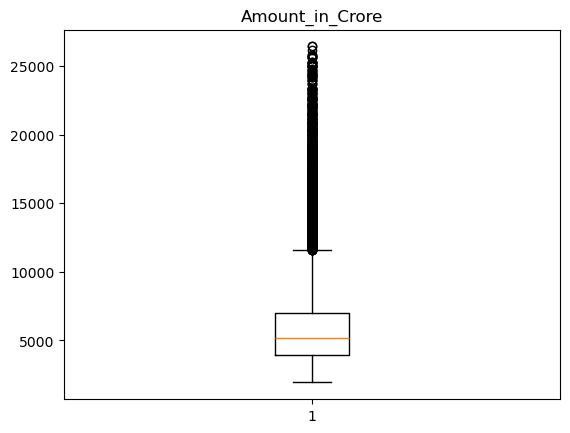

In [194]:
plt.boxplot(y)
plt.title("Amount_in_Crore")
plt.show()

**Model1** Linear regression 

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Fit the model1
model1 = LinearRegression()
model1.fit(X_train_scaled, y_train)

LinearRegression()

In [196]:
#predict using the model 
y_pred_lr = model1.predict(X_test_scaled)

In [197]:
#calculating metrics 
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"Mean Squared Error: {mse_lr:.2f}")
print(f"Mean Absolute Error: {mae_lr:.2f}")
print(f"R-squared: {r2_lr:.2f}")

Mean Squared Error: 5164871.10
Mean Absolute Error: 1415.29
R-squared: 0.63


In [198]:
from sklearn.model_selection import cross_val_score

cv_scores_train1= cross_val_score(model1,X_train_scaled,y_train,cv=5, scoring='r2')
cv_scores_test1= cross_val_score(model1,X_test_scaled,y_test,cv=5)
print(cv_scores_test1)
print(cv_scores_train1)
cv_scores_lr_test= cv_scores_test1.mean()
cv_scores_lr_train= cv_scores_train1.mean()
cv_scores_std_test_lr= cv_scores_test1.std()
print ('Mean cross-validation test score: ' +str(cv_scores_lr_test))
print ('Mean cross-validation train score: ' +str(cv_scores_lr_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

[0.66732217 0.61647812 0.67784429 0.57765884 0.60535806]
[-1.61406126e+15  6.44818782e-01  6.01394758e-01 -1.13546329e+23
  6.30466854e-01]
Mean cross-validation test score: 0.6289322948311287
Mean cross-validation train score: -2.270926607645053e+22
Standard deviation in cv test scores: 0.03796309895279001


In [199]:
Accuracy_lr=model1.score(X_test_scaled, y_test)
print("Model Accuracy (R²):", Accuracy_lr)

Model Accuracy (R²): 0.6347345103715578


**Model2**


In [200]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=None, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [201]:
y_pred_rf=rf_model.predict(X_test_scaled)

In [202]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.2f}")

Mean Absolute Error (MAE): 1075.12
Mean Squared Error (MSE): 3706813.36
R-squared (R²): 0.74


In [203]:
from sklearn.model_selection import cross_val_score

cv_scores_test2= cross_val_score(rf_model,X_test_scaled,y_test,cv=5)
cv_scores_train2= cross_val_score(rf_model,X_train_scaled,y_train,cv=5)
print(cv_scores_test2)
print(cv_scores_train2)
cv_scores_rf_test= cv_scores_test2.mean()
cv_scores_rf_train= cv_scores_train2.mean()
cv_scores_std_test_rf= cv_scores_test2.std()
print ('Mean cross-validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross-validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_rf))

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

[0.73262886 0.69268941 0.73642076 0.61722355 0.6729563 ]
[0.71715912 0.72735854 0.69474968 0.69067486 0.71234081]
Mean cross-validation test score: 0.6903837758254694
Mean cross-validation train score: 0.7084566008602812
Standard deviation in cv test scores: 0.04373900299028668


In [204]:
Accuracy_rf=rf_model.score(X_test_scaled, y_test)
print("Model Accuracy (R²):", Accuracy_rf)

Model Accuracy (R²): 0.7378499924848259


**Model3** Ridge Regression 

In [205]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

ridge_model = Ridge(alpha=100)
ridge_model.fit(X_train_scaled, y_train)

y_pred_rm=ridge_model.predict(X_test_scaled)

mse_rm=mean_squared_error(y_test, y_pred_rm)
R2_rm=r2_score(y_test, y_pred_rm)
print(f"Mean Squared Error: {mse_rm}")
print(f"R-squared (R²): {R2_rm:.2f}")


Mean Squared Error: 5167122.225235314
R-squared (R²): 0.63


In [206]:
from sklearn.linear_model import RidgeCV
alphas = [0.01, 0.1, 1, 10.0, 100, 1000]
ridge_cv=RidgeCV(alphas=alphas)
ridge_cv.fit(X_train_scaled, y_train)

RidgeCV(alphas=[0.01, 0.1, 1, 10.0, 100, 1000])

In [207]:
print("Best alpha:", ridge_cv.alpha_)
print("Train R²:", ridge_cv.score(X_train_scaled, y_train))
print("Test R²:", ridge_cv.score(X_test_scaled, y_test))

Best alpha: 100.0
Train R²: 0.6273922996907689
Test R²: 0.6345753080369834


In [208]:
cv_scores_test3=cross_val_score(ridge_model, X_test_scaled, y_test, cv=5)
cv_scores_train3= cross_val_score(ridge_model,X_train_scaled,y_train,cv=5)
print(cv_scores_test3)
print(cv_scores_train3)
cv_scores_rm_test= cv_scores_test3.mean()
cv_scores_rm_train= cv_scores_train3.mean()
cv_scores_std_test_rm= cv_scores_test3.std()
print ('Mean cross-validation test score: ' +str(cv_scores_rm_test))
print ('Mean cross-validation train score: ' +str(cv_scores_rm_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_rm))

[0.66813888 0.61516491 0.67755091 0.57767078 0.60817018]
[0.63464668 0.64424626 0.60217952 0.60467915 0.62992674]
Mean cross-validation test score: 0.629339131721251
Mean cross-validation train score: 0.6231356685659915
Standard deviation in cv test scores: 0.03781123556428693


In [209]:
Accuracy_rm=ridge_model.score(X_test_scaled, y_test)
print("Model Accuracy (R²):", Accuracy_rm)

Model Accuracy (R²): 0.6345753080369843


**Model4** Gradeint Boosting 

In [210]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize the model
gbr_model = GradientBoostingRegressor(
    n_estimators=200,      # number of trees
    learning_rate=0.1,     # how much each tree contributes
    max_depth=4,           # depth of each individual tree
    min_samples_split=2,   # minimum samples to split
    min_samples_leaf=1,    # minimum samples per leaf
    random_state=42
)

# Fit the model
gbr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_gbr = gbr_model.predict(X_test_scaled)

# Evaluate
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)

print(f"Mean Absolute Error (MAE): {mae_gbr:.2f}")
print(f"Mean Squared Error (MSE): {mse_gbr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbr:.2f}")
print(f"R-squared (R²): {r2_gbr:.2f}")

C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Mean Absolute Error (MAE): 1135.36
Mean Squared Error (MSE): 3796139.10
Root Mean Squared Error (RMSE): 1948.37
R-squared (R²): 0.73


In [211]:
cv_scores_test4=cross_val_score(gbr_model, X_test_scaled, y_test, cv=5)
cv_scores_train4= cross_val_score(gbr_model,X_train_scaled,y_train,cv=5)
print(cv_scores_test4)
print(cv_scores_train4)
cv_scores_gbr_test= cv_scores_test4.mean()
cv_scores_gbr_train= cv_scores_train4.mean()
cv_scores_std_test_gbr= cv_scores_test4.std()
print ('Mean cross-validation test score: ' +str(cv_scores_gbr_test))
print ('Mean cross-validation train score: ' +str(cv_scores_gbr_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_gbr))

C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passe

[0.71549275 0.6822632  0.70708899 0.62277395 0.68816103]
[0.71754524 0.73346617 0.69580496 0.69272482 0.74333274]
Mean cross-validation test score: 0.6831559824937884
Mean cross-validation train score: 0.7165747856647936
Standard deviation in cv test scores: 0.032527812738886726


**Model5** Ada Boost

In [212]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

base_model = DecisionTreeRegressor(max_depth=4)

# AdaBoost Regressor
ada_model = AdaBoostRegressor(
    estimator=base_model,
    n_estimators=200,      # number of weak learners
    learning_rate=0.1,     # controls contribution of each tree
    random_state=42
)

# Fit model
ada_model.fit(X_train_scaled, y_train)

# Predict
y_pred_ada = ada_model.predict(X_test_scaled)



C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [213]:
cv_scores_test5=cross_val_score(ada_model, X_test_scaled, y_test, cv=5)
cv_scores_train5= cross_val_score(ada_model,X_train_scaled,y_train,cv=5)
print(cv_scores_test5)
print(cv_scores_train5)
cv_scores_ada_test= cv_scores_test5.mean()
cv_scores_ada_train= cv_scores_train5.mean()
cv_scores_std_test_ada= cv_scores_test5.std()
print ('Mean cross-validation test score: ' +str(cv_scores_ada_test))
print ('Mean cross-validation train score: ' +str(cv_scores_ada_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_ada))

C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[0.54667047 0.55864827 0.43682741 0.51044272 0.50771219]
[0.52920529 0.4623768  0.54353809 0.51285085 0.49542114]
Mean cross-validation test score: 0.5120602110556596
Mean cross-validation train score: 0.5086784354556853
Standard deviation in cv test scores: 0.04254365323047202


In [214]:
# Evaluate
mse_ada = mean_squared_error(y_test, y_pred_ada)
mae_ada = mean_absolute_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)
rmse_ada = np.sqrt(mse_ada)

print(f"Mean Absolute Error (MAE): {mae_ada:.2f}")
print(f"Mean Squared Error (MSE): {mse_ada:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ada:.2f}")
print(f"R-squared (R²): {r2_ada:.2f}")

Mean Absolute Error (MAE): 1710.26
Mean Squared Error (MSE): 6463524.39
Root Mean Squared Error (RMSE): 2542.35
R-squared (R²): 0.54


***Comparing models*** 

In [215]:
name = ['Random Forest', 'Gradeint Boosting', 'Ada Boost']
model_score_test = [cv_scores_rf_test, cv_scores_gbr_test, cv_scores_ada_test]
model_score_train=[cv_scores_rf_train, cv_scores_gbr_train, cv_scores_ada_train]
model_accuracy=[Accuracy_rf, r2_gbr, r2_ada]

score_acc=pd.DataFrame(list(zip(name, model_accuracy)), columns=['Algorithm', 'Model Accuracy Score'])
score=pd.DataFrame(list(zip(name, model_score_train, model_score_test)), columns=['Algorithm', 'Train Score', 'Test Score'])

In [216]:
score_acc.head()

,Algorithm,Model Accuracy Score
0,Random Forest,0.737850
1,Gradeint Boosting,0.731533
2,Ada Boost,0.542892


In [217]:
score

,Algorithm,Train Score,Test Score
0,Random Forest,0.708457,0.690384
1,Gradeint Boosting,0.716575,0.683156
2,Ada Boost,0.508678,0.512060


Text(0.5, 1.0, 'Comparison of Algorithms')

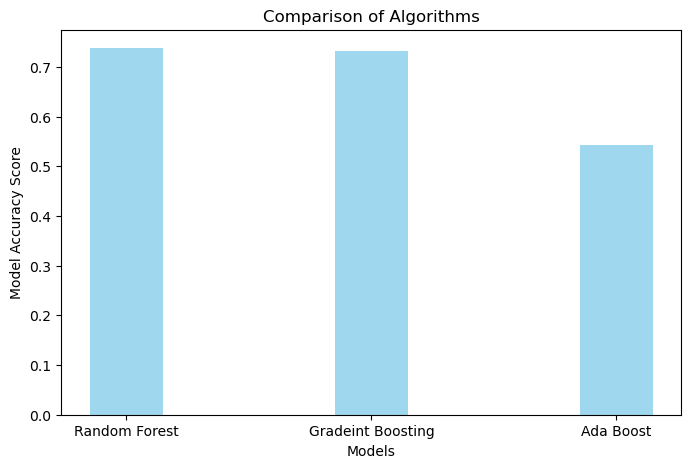

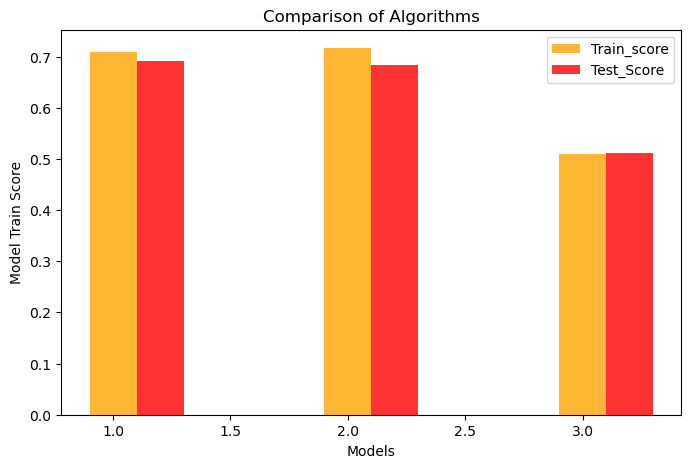

In [218]:
import matplotlib.pyplot as plt
import numpy as np

index = [1,2,3]
index_acc = [1.2,2.2,3.2]
plt.figure(figsize=(8,5))
plt.bar(score_acc['Algorithm'], score_acc['Model Accuracy Score'], color='skyblue', width=0.3, alpha=0.8)
plt.xticks(rotation=0)
plt.xlabel('Models')
plt.ylabel('Model Accuracy Score')
plt.title('Comparison of Algorithms')

plt.figure(figsize=(8,5))
_=plt.bar(index, model_score_train, color='orange', width=0.2, alpha=0.8, label='Train_score')
_=plt.bar(index_acc, model_score_test, color='red', width=0.2, alpha=0.8, label='Test_Score')
plt.xticks(rotation=0)
plt.legend()
plt.xlabel('Models')
plt.ylabel('Model Train Score')
plt.title('Comparison of Algorithms')


**Applying Random Search and Grid Search for Hyperparameter tuning**

**A. Parameter tuning for Random Forest** 

In [219]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

rf = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Step 3: Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,                 # Number of random combinations to try
    cv=5,                      # 5-fold cross-validation
    scoring='r2',              # Evaluation metric
    n_jobs=-1,                 # Use all CPU cores
    random_state=42,
    verbose=2
)

# Step 4: Fit on training data
random_search.fit(X_train_scaled, y_train)

# Step 5: Print results
print("Best Parameters:", random_search.best_params_)
print("Best CV R² Score:", random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\User\anaconda3\Lib\site-packages\skle

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40}
Best CV R² Score: 0.67666260628518


In [220]:
best_rf = RandomForestRegressor(
    n_estimators=500,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

best_rf.fit(X_train_scaled, y_train)
y_pred = best_rf.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE: 1271.5322
MSE: 4394692.9165
R²: 0.6892


In [221]:
# param_grid = {
#     'n_estimators': [200, 300, 400],
#     'max_depth': [10, 15, 20],
#     'min_samples_split': [2, 3, 4],
#     'min_samples_leaf': [1, 2]
# }

# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=5,
#     scoring='r2',
#     n_jobs=-1,
#     verbose=2
# )

# grid_search.fit(X_train_scaled, y_train)

# print("Best Parameters from Grid Search:", grid_search.best_params_)
# print("Best R² Score:", grid_search.best_score_)

# best_rf = grid_search.best_estimator_

# # Predict and evaluate on test set
# y_pred = best_rf.predict(X_test_scaled)
# r2 = r2_score(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)

# print(f"Final Test R²: {r2:.3f}")
# print(f"Final Test MSE: {mse:.2f}")